In [1]:
import maxflow

In [2]:
g = maxflow.Graph[int](2,2)
print(g)

In [3]:
nodes = g.add_nodes(2)
print(nodes) # index to first node?

[0 1]


In [4]:
g.add_edge(nodes[0], nodes[1], 1, 2)
# edge from nodes[0] to nodes[1] with weight 1
# edge from nodes[1] to nodes[0] with weight 2

In [5]:
g.add_tedge(nodes[0], 2, 5)
# edge FROM SOURCE node to nodes[0] with weight 2
# edge from nodes[0] TO TERMINAL node with weight 5

In [6]:
g.add_tedge(nodes[1], 9, 4)
# edge FROM SOURCE node to nodes[1] with weight 9
# edge from nodes[1] TO TERMINAL node with weight 4

In [7]:
# g.add_edge - create edge between non-terminal nodes
# g.add_tedge - set capacities of terminal edges for existing non-terminal node
# g.add_tweights - create edge between non-terminal node and terminal node

In [8]:
flow = g.maxflow()
print("Maximum Flow ", flow)

Maximum Flow  8


In [9]:
print("seg of node 0: ", g.get_segment(nodes[0]))
print("seg of node 1: ", g.get_segment(nodes[1]))
# this is the binary segmentation of the graph
# returns 1 when node belongs to partition of source node (obj node in our case)
# returns 0 when node belongs to partition of terminal node (bkg node in  our case)

seg of node 0:  1
seg of node 1:  0


In [10]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

(64, 64) 255.0 0.0


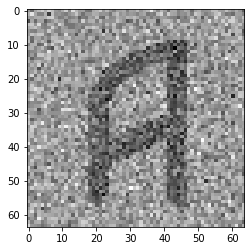

In [11]:
img = 255*plt.imread('a2.png')
print(img.shape, np.max(img), np.min(img))
plt.imshow(img, cmap='gray')

In [12]:
g = maxflow.Graph[int]()
nodeids = g.add_grid_nodes(img.shape)
# add the nodes, nodeids has the identifiers of the nodes
print(type(nodeids), nodeids.shape)

<class 'numpy.ndarray'> (64, 64)


In [13]:
g.add_grid_edges(nodeids, 50)
# add non-terminal edges with same weight

In [14]:
g.add_grid_tedges(nodeids, img, 255-img)
# img (pixel value) is the weight of the edge FROM SOURCE node
# 255-img (inverted pixel value) is the weight of the edge TO TERMINAL node

In [15]:
g.maxflow()
sgm = g.get_grid_segments(nodeids)
# vectorized version of calling get_segment on each node
# in this case, this will return a binary image with samge size as img

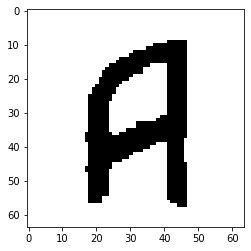

In [16]:
img2 = np.int_(np.logical_not(sgm))

plt.imshow(img2, cmap='gray')